## Objectivos

-   Realizar estudio de los permisos de circulación de la municipalidad de Calbuco año 2023
-   Asumir rol como empleado de la municipalidad de Calbuco y dar respuesta a preguntas 


In [581]:
# Importamos librerias que utilizaremos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#### El dataset fué obtenido desde el portal centralizado de datos del Gobierno de Chile: 
https://datos.gob.cl/dataset/permiso-de-circulacion-ano-2023
   

In [582]:
# 'pc' va a ser el nombre del dataframe y aquí vemos las primeras 5 filas
pc = pd.read_excel('permiso-de-circulacion-2023.xlsx')
pc.head()

,Grupo Vehiculo,Placa,digito,Codigo SII,Año Vehículo,Tasacion,Tipo de Pago,Valor_Neto,Valor_IPC,Valor_Multa,...,Año Permiso,Tipo Vehiculo,Marca,Modelo,Color,Transmisión,Tipo Combustible,Cilindrada,Equipamiento,Numero Puertas
0,Vehiculo Liviano,LYZR-48,6,SU079007720,2020,9284364.0,Presencial,107798,4775,7521,...,2022,STATION WAGON,FORD,ECOSPORT,NEGRO EBANO,Mec,Benc,1500.0,NaN,4
1,Vehiculo Liviano,TZ-4139,0,SD176017101,2001,1375314.0,Presencial,34779,3022,4536,...,2022,AUTOMOVIL,NISSAN,SENTRA,BLANCO,Mec,Benc,1600.0,Norm,4
2,Carga,BLZB-59,0,NaN,2009,3.0,Presencial,196334,6436,11113,...,2022,CAMION,MERCEDES BENZ,AXOR 2533/48,BLANCO,NaN,NaN,NaN,NaN,2
3,Vehiculo Liviano,DRRH-93,K,SD176027713,2013,3689457.0,Presencial,24556,1088,1713,...,2022,AUTOMOVIL,NISSAN,VERSA SENSE,PLATEADO,Mec,Benc,1600.0,Full,4
4,Vehiculo Liviano,LH-8292,7,CT050003794,1994,700809.0,Presencial,34779,3022,4536,...,2022,CAMIONETA,CHEVROLET,LUV,AZUL PETROLEO,Mec,Benc,2300.0,Norm,4


## Análisis Exploratiorio de Datos (EDA)

###  Veamos a que se refieren las columnas del dataset

- Grupo Vehiculo: Vehiculo Liviano, Carga, Transporte Publico
- Placa: Patente de vehículo
- digito: Ultimo nro de cedula del propietario
- Codigo SII: Codigo SII
- Año Vehículo: Año de fabricación del vehículo
- Tasacion: Valor del vehículo en pesos
- Tipo de Pago: Presencial o Internet
- Valor_Neto: Valor neto a pagar por permiso de circulación
- Valor_IPC: Valor IPC
- Valor_Multa: Valor a pagar por concepto de multas
- Valor Pagado: Valor total pagado (Valor_Neto + Valor_IPC + Valor_Multa)
- Forma Pago: 1ra Cuota, 2da Cuota o Total
- Fecha_Pago: Fecha de pago
- Año Permiso: Año del permiso de circulación
- Tipo Vehiculo: STATION WAGON, AUTOMOVIL, CAMION, CAMIONETA, etc...
- Marca: FORD, NISSAN, MERCEDES BENZ, CHEVROLET, etc...
- Modelo: ECOSPORT, SENTRA, AXOR 2533/48, etc...
- Color: Color de vehículo
- Transmisión: Trasnsmisión de vehículo
- Tipo Combustible: Bencina, Diesel, Dual, Eléctrico
- Cilindrada: Cilindrada de vehículo
- Equipamiento: Norm, Full, Equi
- Numero Puertas: Numero de puertas de vehículo

In [583]:
# Cuenta con 10645 registros y 23 columnas
pc.shape

(10645, 23)

In [584]:
# Observamos que los tipos de datos están correctamente formateados
pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10645 entries, 0 to 10644
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Grupo Vehiculo    10645 non-null  object        
 1   Placa             10645 non-null  object        
 2   digito            10645 non-null  object        
 3   Codigo SII        9051 non-null   object        
 4   Año Vehículo      10645 non-null  int64         
 5   Tasacion          10645 non-null  float64       
 6   Tipo de Pago      10645 non-null  object        
 7   Valor_Neto        10645 non-null  int64         
 8   Valor_IPC         10645 non-null  int64         
 9   Valor_Multa       10645 non-null  int64         
 10  Valor Pagado      10645 non-null  int64         
 11  Forma Pago        10645 non-null  object        
 12  Fecha_Pago        10645 non-null  datetime64[ns]
 13  Año Permiso       10645 non-null  int64         
 14  Tipo Vehiculo     1064

In [585]:
# Observemos la distribución general de los datos
pc.describe()

,Año Vehículo,Tasacion,Valor_Neto,Valor_IPC,Valor_Multa,Valor Pagado,Fecha_Pago,Año Permiso,Cilindrada,Numero Puertas
count,10645.000000,1.064500e+04,1.064500e+04,10645.000000,10645.000000,1.064500e+04,10645,10645.000000,9705.000000,10645.000000
mean,2012.947487,5.692932e+06,8.727733e+04,636.927572,1668.284359,8.958254e+04,2023-05-26 16:48:28.407703040,2022.877031,1886.905100,3.266980
min,1980.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,2023-01-03 00:00:00,2010.000000,0.000000,0.000000
25%,2009.000000,1.919213e+06,3.134800e+04,0.000000,0.000000,3.181100e+04,2023-03-27 00:00:00,2023.000000,1500.000000,4.000000
50%,2014.000000,4.483820e+06,5.552600e+04,0.000000,0.000000,5.843200e+04,2023-05-12 00:00:00,2023.000000,1600.000000,4.000000
75%,2018.000000,8.232097e+06,9.966900e+04,0.000000,756.000000,1.020820e+05,2023-08-02 00:00:00,2023.000000,2400.000000,4.000000
max,2024.000000,5.233480e+07,1.965921e+06,83809.000000,222734.000000,1.965921e+06,2023-12-07 00:00:00,2023.000000,18000.000000,5.000000
std,7.164280,5.289164e+06,1.015757e+05,2997.398997,6496.680659,1.037729e+05,NaN,0.547623,719.164717,1.472319


### Este cuadro nos da información valiosa que usaremos para nuestro estudio.

Podemos observar que:
- El registro del año vehicular va desde 1980 hasta 2024
- La tasación media de los vehículos registrados es de alrededor de 5.700.000 clp
- Hay vehículos con tasación de 0 clp, tendremos que buscar una forma de tratar con esto
- El promedio de pago por vehículo es de 89.582 clp
- Los registros de pago van desde el 03-ene-2023 hasta el 07-dic-2023 (Estos son los límites de nuestros datos)
- Hay vehículos con 5 puertas
- Existen columnas con valores nulos

### Formateando columnas con valores erroneos o duplicados 

In [586]:
# Acá vemos que hay diferentes valores para tipos de combustible
pc['Tipo Combustible'].value_counts()

Tipo Combustible
Benc    5978
Dies    3040
DIES     416
BENC     328
Diés       9
Elec       1
DUAL       1
Name: count, dtype: int64

In [587]:
# Lo corregimos de la siguiente forma:
pc['Tipo Combustible'] = pc['Tipo Combustible'].str.capitalize()
pc['Tipo Combustible'] = pc['Tipo Combustible'].str.replace('Diés', 'Dies')
pc['Tipo Combustible'].value_counts()

Tipo Combustible
Benc    6306
Dies    3465
Elec       1
Dual       1
Name: count, dtype: int64

In [588]:
# Acá vemos que hay diferentes valores para Equipamiento
pc['Equipamiento'].value_counts()

Equipamiento
Full    4603
Equi    1825
Norm    1346
EQUI     340
FULL     191
NORM     152
Name: count, dtype: int64

In [589]:
# Lo corregimos de la siguiente forma:
pc['Equipamiento'] = pc['Equipamiento'].str.capitalize()
pc['Equipamiento'].value_counts()

Equipamiento
Full    4794
Equi    2165
Norm    1498
Name: count, dtype: int64

In [590]:
# Acá vemos que hay diferentes valores para trasmisión
pc['Transmisión'].value_counts()

Transmisión
Mec    8031
Aut     997
MEC     641
AUT      48
CVT       9
Name: count, dtype: int64

In [591]:
# Lo corregimos de la siguiente forma:
pc['Transmisión'] = pc['Transmisión'].str.capitalize()
pc['Transmisión'].value_counts()

Transmisión
Mec    8672
Aut    1045
Cvt       9
Name: count, dtype: int64

In [592]:
# El registro para Motocicleta esta escrito de varias formas, vamos a establecer una única forma de mencionarlo
pc['Tipo Vehiculo'].unique()

array(['STATION WAGON', 'AUTOMOVIL', 'CAMION', 'CAMIONETA', 'MOTO',
       'TRACTOR', 'MINIBUS PARTICULAR', 'TAXI COLECTIVO', 'FURGON',
       'SEMI REMOLQUE', 'TRACTOCAMION', 'MINIBUS TURISMO', 'CASA RODANTE',
       'MINIBUS ESCOLAR', 'MINIBUS', 'BUS', 'Moto', 'Hatchback',
       'CARRO ARRASTRE A', 'JEEP', 'SUV', 'TAXI BASICO',
       'TAXI  EJECUTIVO', 'Sedan', 'MAQUINA INDUSTRIAL', 'VAN',
       'CUATRIMOTO', 'Sedán', 'AMBULANCIA', 'Cabriolet', 'OTROS',
       'Comercial', 'MINIBUS PRIVADO', 'REMOLQUE A', 'MOTOCICLETA',
       'REMOLQUE B', 'GRUA', 'RETROEXCAVADORA', 'CARRO BOMBA'],
      dtype=object)

In [593]:
# 'Motocicleta' quedó como único registro
pc['Tipo Vehiculo']= pc['Tipo Vehiculo'].apply(lambda x: x.replace('MOTOCICLETA', 'MOTO'))
pc['Tipo Vehiculo']= pc['Tipo Vehiculo'].apply(lambda x: x.replace('Moto', 'MOTO'))
pc['Tipo Vehiculo']= pc['Tipo Vehiculo'].apply(lambda x: x.replace('MOTO', 'MOTOCICLETA'))
pc['Tipo Vehiculo']= pc['Tipo Vehiculo'].str.capitalize()
pc['Tipo Vehiculo'].unique() 

array(['Station wagon', 'Automovil', 'Camion', 'Camioneta', 'Motocicleta',
       'Tractor', 'Minibus particular', 'Taxi colectivo', 'Furgon',
       'Semi remolque', 'Tractocamion', 'Minibus turismo', 'Casa rodante',
       'Minibus escolar', 'Minibus', 'Bus', 'Hatchback',
       'Carro arrastre a', 'Jeep', 'Suv', 'Taxi basico',
       'Taxi  ejecutivo', 'Sedan', 'Maquina industrial', 'Van',
       'Cuatrimotocicleta', 'Sedán', 'Ambulancia', 'Cabriolet', 'Otros',
       'Comercial', 'Minibus privado', 'Remolque a', 'Remolque b', 'Grua',
       'Retroexcavadora', 'Carro bomba'], dtype=object)

## Tratando con valores nulos

In [594]:
pc.isnull().sum()

Grupo Vehiculo         0
Placa                  0
digito                 0
Codigo SII          1594
Año Vehículo           0
Tasacion               0
Tipo de Pago           0
Valor_Neto             0
Valor_IPC              0
Valor_Multa            0
Valor Pagado           0
Forma Pago             0
Fecha_Pago             0
Año Permiso            0
Tipo Vehiculo          0
Marca                  0
Modelo                 0
Color                  0
Transmisión          919
Tipo Combustible     872
Cilindrada           940
Equipamiento        2188
Numero Puertas         0
dtype: int64

In [595]:
# ¿Qué haremos con los valores faltantes?:

# El Codigo SII lo reemplazaremos por 'No indicado'
pc['Codigo SII']= pc['Codigo SII'].fillna('No indicado') 

# La trasmisión lo reemplazamos por la moda
pc['Transmisión'] = pc['Transmisión'].fillna(pc['Transmisión'].mode)

# El tipo de combustible lo reemplazamos por la moda
pc['Tipo Combustible'] = pc['Tipo Combustible'].fillna(pc['Tipo Combustible'].mode)

# Con la cilindrada haremos un backfill (Se reemplaza por el valor no nulo siguiente)
pc['Cilindrada'] = pc['Cilindrada'].fillna(method='backfill')

# Con el equipamiento actualizamos en base a la media de la tasación del vehículo
# Para este caso crearemos una funcion:
def actualizar_equipamiento(pc):
    
    """ 
    Actualiza la columna equipamiento, 
    'Full' si la tasacion es mayor o igual que la media
    'Norm' Si la tasacion es menor que la media
    """

    # Calcular la media de la columna 'Tasacion'
    media_tasacion = pc['Tasacion'].mean()

    # Aplicar la lógica de actualización de 'Equipamiento'
    pc['Equipamiento'] = pc.apply(lambda x: 'Full' if x['Tasacion'] >= media_tasacion else 'Norm', axis=1)

    return pc

# Aplicamos la función al dataframe
pc = actualizar_equipamiento(pc)

C:\Users\jzamb\AppData\Local\Temp\ipykernel_12040\1165948471.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pc['Cilindrada'] = pc['Cilindrada'].fillna(method='backfill')


In [596]:
# Ya no tenemos valores nulos
pc.isnull().sum()

Grupo Vehiculo      0
Placa               0
digito              0
Codigo SII          0
Año Vehículo        0
Tasacion            0
Tipo de Pago        0
Valor_Neto          0
Valor_IPC           0
Valor_Multa         0
Valor Pagado        0
Forma Pago          0
Fecha_Pago          0
Año Permiso         0
Tipo Vehiculo       0
Marca               0
Modelo              0
Color               0
Transmisión         0
Tipo Combustible    0
Cilindrada          0
Equipamiento        0
Numero Puertas      0
dtype: int64

Hay valores en la tasación de ciertos vehiculos que fueron tipeados de 2 formas, **la primera: "1.000.000" (1 millon clp) y la segunda: "1" (1 millon clp)**. Basado en algunas observaciones, llegué a la conclusion que los registros con valores de tasación menores a 10 están expresadas de la segunda forma. Así que vamos a estandarizar todos los registros para que queden de esta manera.

In [597]:
# Los valores mayores que 10 los dividimos por millón
pc['Tasacion'] = pc['Tasacion'].apply(lambda x: x / 1000000 if x > 10 else x)

# Los valores de tasación cero los reemplazamos por el nuevo promedio de tasación
tasacion_media = pc['Tasacion'].mean()
pc['Tasacion'] = pc['Tasacion'].apply(lambda x: tasacion_media if x == 0 else x)

pc['Tasacion']

0         9.284364
1         1.375314
2         3.000000
3         3.689457
4         0.700809
           ...    
10640     2.191989
10641     1.135309
10642     0.367288
10643     1.090257
10644    13.272466
Name: Tasacion, Length: 10645, dtype: float64

### <span style="color: #AB9A05;"> **Ahora vamos a realizar algunas preguntas para que le demos respuesta utilizando estos datos:** </spam>

1. ¿Cuál es el mes dónde más se hacen pagos de permisos de circulacion? 
2. ¿Cuál es el total de ingresos del año?
3. Mostrar la distribucion de vehículos por año de fabricacion
4. ¿Cómo influye el año del vehículo con relacion con el valor a pagar?
5. ¿Cómo influye la tasación del vehículo en el costo del permiso de circulación?
6. ¿Cuál es el aporte que hace cada grupo de vehículo a los ingresos?
7. ¿En promedio, cuáles son los tipo de vehículos que pagan más y menos en permisos de circulación?
8. ¿Cuál es el tipo de pago preferido?
9. ¿Cómo varía el ingreso mensual por multas?
10. ¿Cuáles son los vehículos que cometieron más infracciones en el año?
11. ¿Qué relación hay entre el valor ipc y el valor de las multas cursadas?
12. ¿Existe una correlación entre la cilindrada del vehículo y el monto del permiso de circulación?
    

### <span style="color: #AB9A05;"> 1. ¿Cuál es el total de ingresos del año? </spam>

In [598]:
total2023 = pc.groupby(pc['Fecha_Pago'].dt.year)['Valor_Neto'].sum()
total2023= total2023.values[0]

print(f'Total de ingresos año 2023: {total2023:,}')

Total de ingresos año 2023: 929,067,154


### <span style="color: #AB9A05;">  2. ¿Cuál es el mes dónde más se reciben más ingresos por permisos de circulacion?

</span>

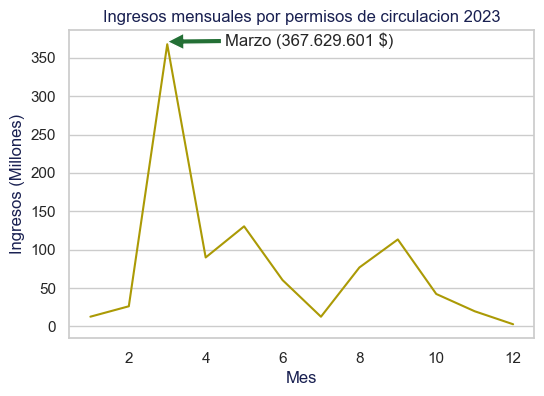

In [599]:
pagos_diarios= pc.groupby(pc['Fecha_Pago'].dt.month)['Valor Pagado'].sum()
pagos_diarios = pagos_diarios / 1000000

plt.figure(figsize=(6,4))
sns.set(style="whitegrid")
sns.lineplot(pagos_diarios, color= '#AB9A05'
             )

plt.title('Ingresos mensuales por permisos de circulacion 2023', color='#192051')
plt.xlabel('Mes', color='#192051')
plt.ylabel('Ingresos (Millones)', color='#192051')

plt.annotate('Marzo (367.629.601 $)', 
             xy=(3, 371),  # Coordenadas del punto a resaltar
             xytext=(4.5, 365),  # Coordenadas del texto
             arrowprops=dict(facecolor='#236F35'))  # Propiedades de la flecha

ax = plt.gca()
ax.xaxis.grid(False)

plt.show()

### <span style="color: #AB9A05;"> 3. Mostrar la distribucion de vehículos por año de fabricacion </spam>

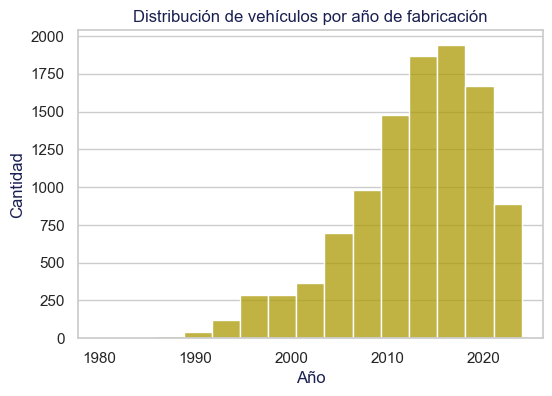

In [600]:
plt.figure(figsize=(6,4))

sns.histplot(x=pc['Año Vehículo'], bins=15, color='#AB9A05')

plt.title('Distribución de vehículos por año de fabricación', color= '#192051')
plt.xlabel('Año', color='#192051')
plt.ylabel('Cantidad', color='#192051')

ax = plt.gca()
ax.xaxis.grid(False)

plt.show()

*Vehículos entre los años 2010 y 2020 son la mayoría*

### <span style="color: #AB9A05;"> 4. ¿Cómo influye el año del vehículo con relacion con el valor a pagar? </spam>

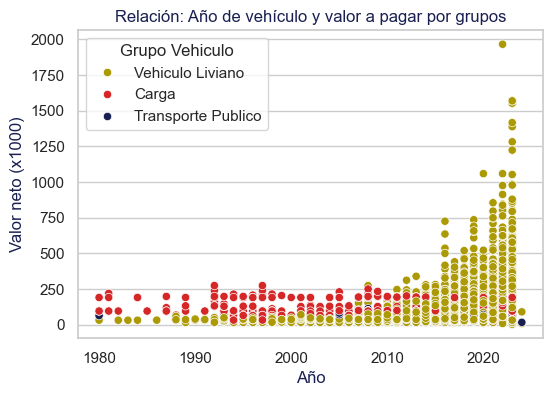

In [601]:
positivos = pc[pc['Valor_Neto'] > 0]

anio_vehi = positivos['Año Vehículo']
valor= positivos['Valor_Neto'] / 1000

plt.figure(figsize=(6,4))
custom_colors = ['#AB9A05', "tab:red","#192051"]
sns.scatterplot(x=anio_vehi, y=valor, hue=positivos['Grupo Vehiculo'], palette=custom_colors)

plt.title('Relación: Año de vehículo y valor a pagar por grupos', color='#192051')
plt.xlabel('Año', color='#192051')
plt.ylabel('Valor neto (x1000)', color='#192051')

ax = plt.gca()
ax.xaxis.grid(False)

plt.show()

*Se observa poca variación hasta el año 2010, a partir de allí se observa incremento en valor a pagar*

### <span style="color: #AB9A05;"> 5. ¿Cómo influye la tasación del vehículo en el costo del permiso de circulación? </spam>

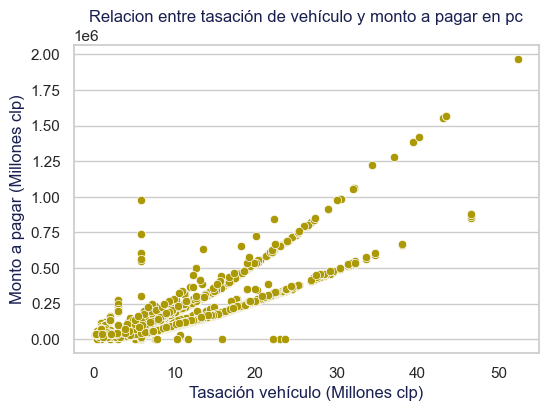

In [602]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=pc['Tasacion'], y=pc['Valor_Neto'], color='#AB9A05')

plt.title('Relacion entre tasación de vehículo y monto a pagar en pc', color= '#192051')
plt.xlabel('Tasación vehículo (Millones clp)', color='#192051')
plt.ylabel('Monto a pagar (Millones clp)', color='#192051')

ax = plt.gca()
ax.xaxis.grid(False)

plt.show()

*Se observa correlación positiva entre tasación y Valor neto*

### <span style="color: #AB9A05;"> 6. ¿Cuál es el aporte que hace cada grupo de vehículo a los ingresos? </spam>

In [603]:
data=pc.groupby('Grupo Vehiculo')['Valor_Neto'].sum().sort_values(ascending=False)

for i, j in enumerate(data):
    print(f'Aporte : {data.index[i]} {j:,}')

Aporte : Vehiculo Liviano 831,006,201
Aporte : Carga 68,982,163
Aporte : Transporte Publico 29,078,790


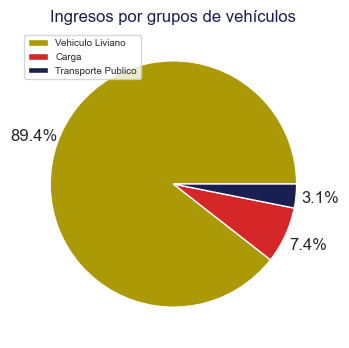

In [604]:
plt.figure(figsize=(6,4))

colores = ['#AB9A05', "tab:red","#192051"]

data.plot(kind='pie',
          autopct= '%1.1f%%',
          pctdistance=1.2,
          labels=None,
          colors=colores
          )

plt.legend(data.index, loc='upper left', fontsize=7)

plt.title('Ingresos por grupos de vehículos', color= '#192051')
plt.ylabel('')

plt.show()

*Vehículos livianos aportan apróximadamente el 90% del total de ingresos del año*

### <span style="color: #AB9A05;"> 7. ¿En promedio, cuáles son los tipo de vehículos que pagan más y menos en permisos de circulación? </spam>

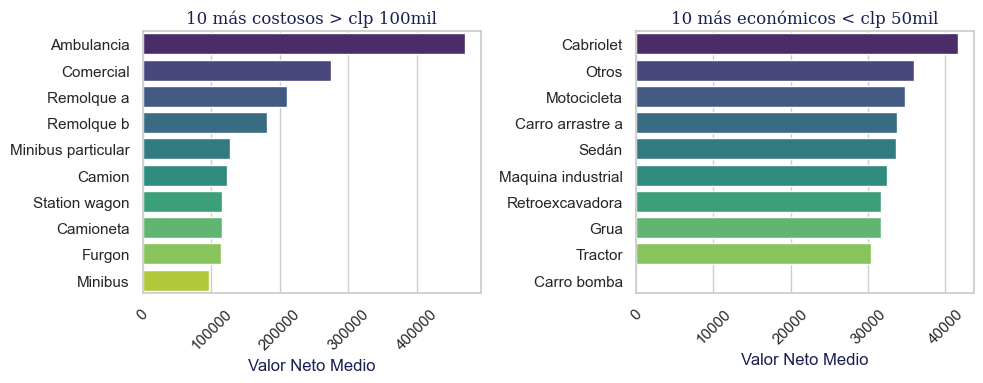

In [605]:
tipos = pc.groupby('Tipo Vehiculo', as_index=False)['Valor_Neto'].mean().sort_values(by='Valor_Neto', ascending=False)
top_10= tipos.head(10)
tail_10= tipos.tail(10)

fig, axs = plt.subplots(1, 2, figsize=(10,4))

# Primer gráfico
sns.barplot(y='Tipo Vehiculo', x='Valor_Neto', data=top_10, hue= 'Tipo Vehiculo', palette='viridis', ax=axs[0])

axs[0].set_title('10 más costosos > clp 100mil', 
                 fontdict={'family': 'serif', 'color': '#192051', 'size': 12})

axs[0].set_xlabel('Valor Neto Medio', color='#192051')
axs[0].set_ylabel('')

axs[0].tick_params(axis='x', rotation=45)


# Segundo gráfico
sns.barplot(y='Tipo Vehiculo', x='Valor_Neto', data=tail_10, hue= 'Tipo Vehiculo', palette='viridis', ax=axs[1])

axs[1].set_title('10 más económicos < clp 50mil',
                 fontdict={'family': 'serif', 'color':  '#192051', 'size': 12})

axs[1].set_xlabel('Valor Neto Medio', color='#192051')
axs[1].set_ylabel('')

axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()

*Ambulancias, comerciales y remolques son los vehículos con permisos de circulación más costosos, se observa también que los Carro bomba no pagan por permiso de circulación*

### <span style="color: #AB9A05;"> 8. ¿Cuál es el tipo de pago preferido? </spam>

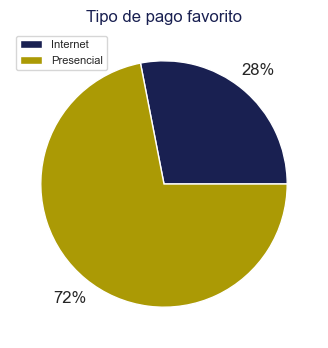

In [606]:
tipos_de_pago = pc.groupby('Tipo de Pago').size()

plt.figure(figsize=(6,4))

colores = ['#192051', '#AB9A05']

tipos_de_pago.plot(kind='pie',
                   autopct = '%1.f%%',
                   pctdistance=1.2,
                   colors=colores,
                   labels=None)

plt.legend(tipos_de_pago.index, 
           loc='upper left', 
           fontsize=8)

plt.title('Tipo de pago favorito', color= '#192051')

plt.show()

### <span style="color: #AB9A05;"> 9. ¿Cómo varía el ingreso mensual por multas? </spam>

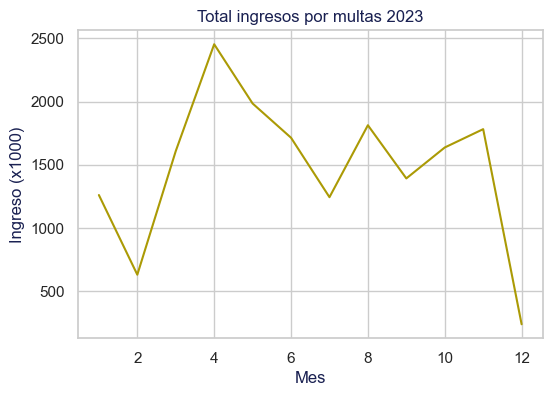

In [607]:
multas = pc.groupby(pc['Fecha_Pago'].dt.month)['Valor_Multa'].sum()
multas = multas / 1000

plt.figure(figsize=(6,4))

sns.lineplot(multas, color='#AB9A05')

plt.title('Total ingresos por multas 2023', color= '#192051')
plt.xlabel('Mes', color='#192051')
plt.ylabel('Ingreso (x1000)', color='#192051')

plt.show()

*Quitando el mes de diciembre que tenemos pocos registros, el mes de febrero presentó menores pagos por concepto de multas*

### <span style="color: #AB9A05;"> 10. ¿Cuáles son los vehículos que cometieron más infracciones en el año? </spam>

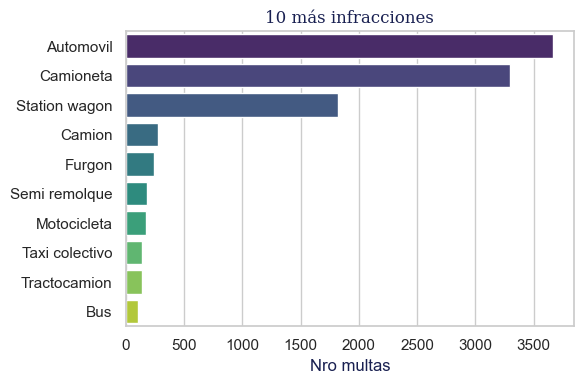

In [611]:
top_multados = pc.groupby('Tipo Vehiculo', as_index=False)['Tipo Vehiculo'].size().sort_values(by='size', ascending=False)
top10 = top_multados.head(10)

plt.figure(figsize=(6,4))

sns.barplot(y='Tipo Vehiculo', x='size', data=top10, 
            hue= 'Tipo Vehiculo', 
            palette='viridis')

plt.title('10 más infracciones', 
                 fontdict={'family': 'serif', 'color':  '#192051', 'size': 12})

plt.xlabel('Nro multas', color='#192051')
plt.ylabel('')

plt.tick_params(axis='x')

plt.tight_layout()

plt.show()

*Automoviles, camionetas y Station wagon registraron la mayoría de multas cursadas*

### <span style="color: #AB9A05;"> 11. ¿Qué relación hay entre el valor ipc y el valor de las multas cursadas? </spam>

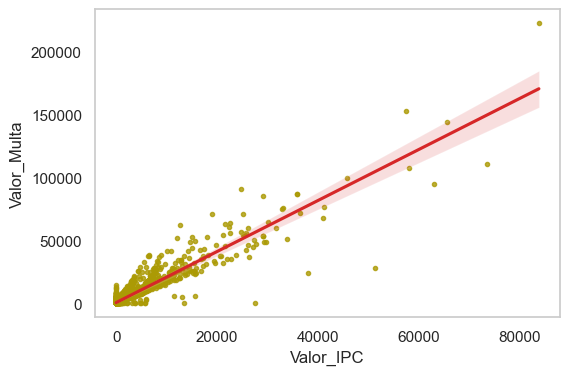

In [612]:
plt.figure(figsize=(6,4))

sns.regplot(x=pc['Valor_IPC'], y=pc['Valor_Multa'], 
            marker='.',
            color='#AB9A05', 
            line_kws={"color": "tab:red"})

ax = plt.gca()
ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.show()

*Clara correlación positiva observada, esto quiere decir que cuando aumenta el valor IPC, también aumenta el valor de la multa*

### <span style="color: #AB9A05;"> 12. ¿Existe una correlación entre la cilindrada del vehículo y el monto del permiso de circulación? </spam>

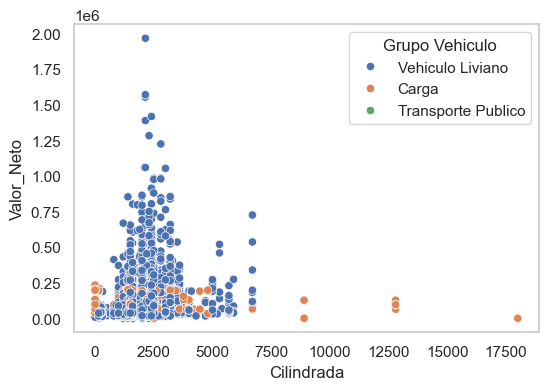

In [613]:
plt.figure(figsize=(6,4))

sns.scatterplot(x=pc['Cilindrada'], y=pc['Valor_Neto'], hue=pc['Grupo Vehiculo'])

ax = plt.gca()
ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.show()

*No se obseva correlación alguna*

## Autor

<a href="https://www.linkedin.com/in/jesus-oliveros-860955223/" target="_blank">Jesús Oliveros</a>

### Data set proporcionado por:

Jorge Agüero

https://datos.gob.cl/dataset/permiso-de-circulacion-ano-2023

## Change Log

| Fecha (DD-MM-YYYY)| Cambiado por | Descripcion del cambio                    |
| ----------------- | ---------- | ---------------------------------------- |
| 21-12-2023        | Jesús Oliveros| Creación         |

### Grácias por leer